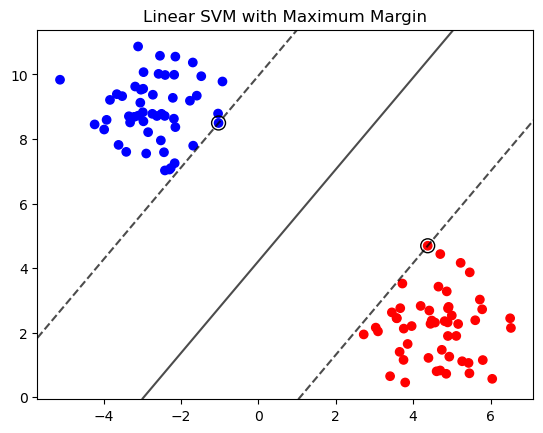

In [2]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Create 2D data
X, y = make_blobs(n_samples=100, centers=2, random_state=42)

# Train linear SVM
clf = SVC(kernel="linear", C=1)
clf.fit(X, y)

# Plot
def plot_svm(clf, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr")

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
               linestyles=['--', '-', '--'])

    # Plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')

plot_svm(clf, X, y)
plt.title("Linear SVM with Maximum Margin")
plt.show()


In [3]:
# SVM for Regression: SVR
from sklearn.svm import SVR
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=50, noise=0.1, random_state=42)
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X, y)


SVR(C=100)

In [4]:
clf.support_vectors_  # Show critical points (support vectors)
clf.decision_function(X_test)  # How far from the boundary


NameError: name 'X_test' is not defined

In [ ]:
# Linear SVM
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import numpy as np

# Load Iris Dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # Using petal length and width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica = 1, others = 0

# Build pipeline
svm_clf = Pipeline([
    ("scaler", StandardScaler()),              # Feature Scaling is important!
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

# Train the model
svm_clf.fit(X, y)

# Make a prediction
svm_clf.predict([[5.5, 1.7]])  # Example: petal length=5.5, width=1.7


array([1.])